In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import json
os.chdir('/home/bohdan/projects/glider/lux-ai')
from lux.config import EnvConfig
from lux.kit import GameState, process_obs, to_json, from_json, process_action, obs_to_game_state
import json 
from utils.kaggle_utils import parse_kaggle_env_episode

In [4]:
with open('dataset_generation/50785648.json', 'r') as f:
    episode = json.load(f)


lux_ai_episode = parse_kaggle_env_episode(episode)

In [5]:
from rl_agents.agent import Agent
from luxai_s2.env import LuxAI_S2
import numpy as np


default_config = {'max_episode_length': 1000, 'map_size': 48, 'verbose': 2, 'validate_action_space': True, 'max_transfer_amount': 3000, 'MIN_FACTORIES': 2, 'MAX_FACTORIES': 5, 'CYCLE_LENGTH': 50, 'DAY_LENGTH': 30, 'UNIT_ACTION_QUEUE_SIZE': 20, 'MAX_RUBBLE': 100, 'FACTORY_RUBBLE_AFTER_DESTRUCTION': 50, 'INIT_WATER_METAL_PER_FACTORY': 150, 'INIT_POWER_PER_FACTORY': 1000, 'MIN_LICHEN_TO_SPREAD': 20, 'LICHEN_LOST_WITHOUT_WATER': 1, 'LICHEN_GAINED_WITH_WATER': 1, 'MAX_LICHEN_PER_TILE': 100, 'POWER_PER_CONNECTED_LICHEN_TILE': 1, 'LICHEN_WATERING_COST_FACTOR': 10, 'BIDDING_SYSTEM': True, 'FACTORY_PROCESSING_RATE_WATER': 100, 'ICE_WATER_RATIO': 4, 'FACTORY_PROCESSING_RATE_METAL': 50, 'ORE_METAL_RATIO': 5, 'FACTORY_CHARGE': 50, 'FACTORY_WATER_CONSUMPTION': 1, 'POWER_LOSS_FACTOR': 0.5, 'ROBOTS': {'LIGHT': {'METAL_COST': 10, 'POWER_COST': 50, 'CARGO_SPACE': 100, 'BATTERY_CAPACITY': 150, 'CHARGE': 1, 'INIT_POWER': 50, 'MOVE_COST': 1, 'RUBBLE_MOVEMENT_COST': 0.05, 'DIG_COST': 5, 'DIG_RUBBLE_REMOVED': 2, 'DIG_RESOURCE_GAIN': 2, 'DIG_LICHEN_REMOVED': 10, 'SELF_DESTRUCT_COST': 10, 'RUBBLE_AFTER_DESTRUCTION': 1, 'ACTION_QUEUE_POWER_COST': 1}, 'HEAVY': {'METAL_COST': 100, 'POWER_COST': 500, 'CARGO_SPACE': 1000, 'BATTERY_CAPACITY': 3000, 'CHARGE': 10, 'INIT_POWER': 500, 'MOVE_COST': 20, 'RUBBLE_MOVEMENT_COST': 1, 'DIG_COST': 60, 'DIG_RUBBLE_REMOVED': 20, 'DIG_RESOURCE_GAIN': 20, 'DIG_LICHEN_REMOVED': 100, 'SELF_DESTRUCT_COST': 100, 'RUBBLE_AFTER_DESTRUCTION': 10, 'ACTION_QUEUE_POWER_COST': 10}}}
default_config = EnvConfig.from_dict(default_config)

pygame 2.2.0 (SDL 2.0.22, Python 3.9.16)
Hello from the pygame community. https://www.pygame.org/contribute.html


# What to do

[ ] Prosta wizualizacja stanu w lux ai podobna do tego co był w tym tutorialu

[ ] LeViT

[ ] LeViT + informacja o robocie

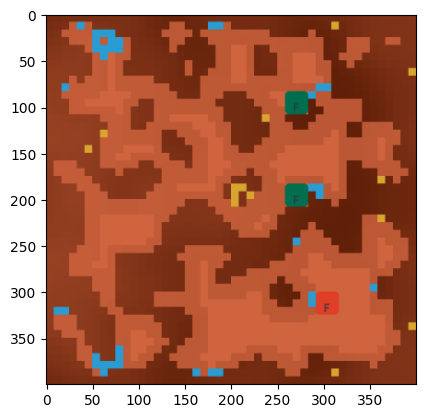

In [7]:
from luxai_s2.pyvisual.visualizer import Visualizer
from luxai_s2.state import State
from matplotlib import pyplot as plt

env_state = State.from_obs(lux_ai_episode[4], default_config)
vis = Visualizer(env_state)
vis.update_scene(env_state)
w = h = 400
img = vis._create_image_array(vis.surf, (w, h))
plt.imshow(img)

